In [1]:
# Import necessary packages and read in original data
import pandas as pd
import spacy
from spacy.tokens import DocBin

mg_df = pd.read_csv('mg_df.csv')


In [2]:
# Load in ALL Doc objects-- both pipelines, and objects (tokens, lemmas, POS, etc.)
# from both before and after my orthographic changes
import fr_dep_news_trf
nlp = fr_dep_news_trf.load()

docbintakeout = DocBin().from_disk('./mg_fr_dep_news_trf.spacy')
docs = list(docbintakeout.get_docs(nlp.vocab))
mg_df['Article Dep Docs'] = docs

docbintakeout = DocBin().from_disk('./clean_mg_dep_docs.spacy')
docs = list(docbintakeout.get_docs(nlp.vocab))
mg_df['mod_dep_docs'] = docs

import fr_core_news_sm
nlp = fr_core_news_sm.load()

docbintakeout = DocBin().from_disk('./mg_fr_core_docs.spacy')
docs = list(docbintakeout.get_docs(nlp.vocab))
mg_df['Article Core Docs'] = docs

docbintakeout = DocBin().from_disk('./clean_mg_core_docs.spacy')
docs = list(docbintakeout.get_docs(nlp.vocab))
mg_df['mod_core_docs'] = docs


In [3]:
# Create new large dataframe which collects all the data of interest from these Doc objects
# Tokens, lemmas, and POS from the pipelines will be collected so we can analyze text individually.
def get_tokens(doc):
    return [(token.text) for token in doc]
def get_lemmas(doc):
    return [(token.lemma_) for token in doc]
def get_pos(doc):
    return [(token.pos_) for token in doc]

pre_post = pd.concat(
    [
        mg_df['Article Dep Docs'].apply(get_tokens).to_frame(),
        mg_df['Article Dep Docs'].apply(get_lemmas).to_frame(),
        mg_df['Article Dep Docs'].apply(get_pos).to_frame(),
        mg_df['Article Core Docs'].apply(get_lemmas).to_frame(),
        mg_df['Article Core Docs'].apply(get_pos).to_frame(),
        mg_df['mod_dep_docs'].apply(get_tokens).to_frame(),
        mg_df['mod_dep_docs'].apply(get_lemmas).to_frame(),
        mg_df['mod_dep_docs'].apply(get_pos).to_frame(),
        mg_df['mod_core_docs'].apply(get_lemmas).to_frame(),
        mg_df['mod_core_docs'].apply(get_pos).to_frame()
    ],
    axis = 1,
)
pre_post.columns = ['tokens_pre', 'dep_lemmas_pre', 'dep_pos_pre', 'core_lemmas_pre', 'core_pos_pre',
                    'tokens_post', 'dep_lemmas_post', 'dep_pos_post', 'core_lemmas_post', 'core_pos_post']
pre_post

,tokens_pre,dep_lemmas_pre,dep_pos_pre,core_lemmas_pre,core_pos_pre,tokens_post,dep_lemmas_post,dep_pos_post,core_lemmas_post,core_pos_post
0,"[Le, Libraire, Au, Lecteur, ., CE, Livre, doit...","[le, libraire, au, lecteur, ., ce, livre, devo...","[DET, NOUN, ADP, NOUN, PUNCT, DET, NOUN, VERB,...","[le, libraire, au, Lecteur, ., ce, livre, devo...","[DET, NOUN, ADP, PROPN, PUNCT, DET, NOUN, VERB...","[Le, Libraire, Au, Lecteur, ., CE, Livre, doit...","[le, libraire, au, lecteur, ., ce, livre, devo...","[DET, NOUN, ADP, NOUN, PUNCT, DET, NOUN, VERB,...","[le, libraire, au, Lecteur, ., ce, livre, devo...","[DET, NOUN, ADP, PROPN, PUNCT, DET, NOUN, VERB..."
1,"[MADAME, ,, Il, n’, estoit, pas, besoin, de, m...","[monsieur, ,, il, n’, estoit, pas, besoin, de,...","[NOUN, PUNCT, PRON, ADV, VERB, ADV, NOUN, ADP,...","[monsieur, ,, il, n’, estoit, pas, besoin, de,...","[NOUN, PUNCT, PRON, PROPN, VERB, ADV, NOUN, AD...","[MADAME, ,, Il, n’, estait, pas, besoin, de, m...","[monsieur, ,, il, n’, ester, pas, besoin, de, ...","[NOUN, PUNCT, PRON, ADV, VERB, ADV, NOUN, ADP,...","[monsieur, ,, il, n’, ester, pas, besoin, de, ...","[NOUN, PUNCT, PRON, PRON, VERB, ADV, NOUN, ADP..."
2,"[c’, est, pourquoy, je, commence, par, une, Hi...","[c’, être, pourquoy, je, commencer, par, un, h...","[PRON, AUX, ADV, PRON, VERB, ADP, DET, NOUN, P...","[c’, être, pourquoy, je, commencer, par, un, h...","[ADJ, AUX, ADV, PRON, VERB, ADP, DET, NOUN, PU...","[c’, est, pourquoi, je, commence, par, une, Hi...","[c’, être, pourquoi, je, commencer, par, un, h...","[PRON, VERB, ADV, PRON, VERB, ADP, DET, NOUN, ...","[c’, être, pourquoi, je, commencer, par, un, h...","[ADJ, VERB, ADV, PRON, VERB, ADP, DET, NOUN, P..."
3,"[Quoy, que, mon, dessein, ne, soit, pas, de, v...","[quoy, que, mon, dessein, ne, être, pas, de, v...","[ADV, SCONJ, DET, NOUN, ADV, VERB, ADV, ADP, P...","[quoy, que, mon, dessein, ne, être, pas, de, v...","[ADJ, SCONJ, DET, NOUN, ADV, AUX, ADV, ADP, PR...","[Quoi, que, mon, dessein, ne, soit, pas, de, v...","[quoi, que, mon, dessein, ne, être, pas, de, v...","[ADV, SCONJ, DET, NOUN, ADV, VERB, ADV, ADP, P...","[quoi, que, mon, dessein, ne, être, pas, de, v...","[PRON, SCONJ, DET, NOUN, ADV, AUX, ADV, ADP, P..."
4,"[Je, ne, sçais, si, je, vous, dois, mander, qu...","[je, ne, sçer, si, je, vous, devoir, mander, q...","[PRON, ADV, VERB, SCONJ, PRON, PRON, VERB, VER...","[je, ne, sçer, si, je, vous, devoir, mander, q...","[PRON, ADV, VERB, SCONJ, PRON, PRON, VERB, VER...","[Je, ne, sais, si, je, vous, dois, mander, que...","[je, ne, savoir, si, je, vous, devoir, mander,...","[PRON, ADV, VERB, SCONJ, PRON, PRON, VERB, VER...","[je, ne, savoir, si, je, vous, devoir, mander,...","[PRON, ADV, VERB, SCONJ, PRON, PRON, VERB, VER..."
...,...,...,...,...,...,...,...,...,...,...
8027,"[CHANSON, ., Je, vous, nomme, sans, que, j', y...","[chanson, ., je, vous, nommer, sans, que, je, ...","[NOUN, PUNCT, PRON, PRON, VERB, ADP, SCONJ, PR...","[chanson, ., je, vous, nommer, sans, que, je, ...","[NOUN, PUNCT, PRON, PRON, VERB, ADP, SCONJ, PR...","[CHANSON, ., Je, vous, nomme, sans, que, j', y...","[chanson, ., je, vous, nommer, sans, que, je, ...","[NOUN, PUNCT, PRON, PRON, VERB, ADP, SCONJ, PR...","[chanson, ., je, vous, nommer, sans, que, je, ...","[NOUN, PUNCT, PRON, PRON, VERB, ADP, SCONJ, PR..."
8028,"[Nous, ne, donnons, la, Pastorale, suivante, q...","[nous, ne, donner, le, pastorale, suivant, qu’...","[PRON, ADV, VERB, DET, NOUN, ADJ, ADV, ADP, NO...","[nous, ne, donner, le, pastorale, suivant, qu’...","[PRON, ADV, VERB, DET, NOUN, ADJ, NOUN, ADP, N...","[Nous, ne, donnons, la, Pastorale, suivante, q...","[nous, ne, donner, le, pastorale, suivant, qu’...","[PRON, ADV, VERB, DET, NOUN, ADJ, ADV, ADP, NO...","[nous, ne, donner, le, pastorale, suivant, qu’...","[PRON, ADV, VERB, DET, NOUN, ADJ, NOUN, ADP, N..."
8029,"[CHANSON, ., L', air, est, de, Monsieur, Moure...","[CHANSON, ., le, air, être, de, Monsieur, Mour...","[PROPN, PUNCT, DET, NOUN, AUX, ADP, NOUN, PROP

In [4]:
# Dataframe of data before modification
dep_core_pre_comp = pd.concat(
    [
        pre_post['tokens_pre'].to_frame(),
        pre_post['dep_lemmas_pre'].to_frame(),
        pre_post['dep_pos_pre'].to_frame(),
        pre_post['core_lemmas_pre'].to_frame(),
        pre_post['core_pos_pre'].to_frame()
    ],
    axis = 1
)
dep_core_pre_comp

,tokens_pre,dep_lemmas_pre,dep_pos_pre,core_lemmas_pre,core_pos_pre
0,"[Le, Libraire, Au, Lecteur, ., CE, Livre, doit...","[le, libraire, au, lecteur, ., ce, livre, devo...","[DET, NOUN, ADP, NOUN, PUNCT, DET, NOUN, VERB,...","[le, libraire, au, Lecteur, ., ce, livre, devo...","[DET, NOUN, ADP, PROPN, PUNCT, DET, NOUN, VERB..."
1,"[MADAME, ,, Il, n’, estoit, pas, besoin, de, m...","[monsieur, ,, il, n’, estoit, pas, besoin, de,...","[NOUN, PUNCT, PRON, ADV, VERB, ADV, NOUN, ADP,...","[monsieur, ,, il, n’, estoit, pas, besoin, de,...","[NOUN, PUNCT, PRON, PROPN, VERB, ADV, NOUN, AD..."
2,"[c’, est, pourquoy, je, commence, par, une, Hi...","[c’, être, pourquoy, je, commencer, par, un, h...","[PRON, AUX, ADV, PRON, VERB, ADP, DET, NOUN, P...","[c’, être, pourquoy, je, commencer, par, un, h...","[ADJ, AUX, ADV, PRON, VERB, ADP, DET, NOUN, PU..."
3,"[Quoy, que, mon, dessein, ne, soit, pas, de, v...","[quoy, que, mon, dessein, ne, être, pas, de, v...","[ADV, SCONJ, DET, NOUN, ADV, VERB, ADV, ADP, P...","[quoy, que, mon, dessein, ne, être, pas, de, v...","[ADJ, SCONJ, DET, NOUN, ADV, AUX, ADV, ADP, PR..."
4,"[Je, ne, sçais, si, je, vous, dois, mander, qu...","[je, ne, sçer, si, je, vous, devoir, mander, q...","[PRON, ADV, VERB, SCONJ, PRON, PRON, VERB, VER...","[je, ne, sçer, si, je, vous, devoir, mander, q...","[PRON, ADV, VERB, SCONJ, PRON, PRON, VERB, VER..."
...,...,...,...,...,...
8027,"[CHANSON, ., Je, vous, nomme, sans, que, j', y...","[chanson, ., je, vous, nommer, sans, que, je, ...","[NOUN, PUNCT, PRON, PRON, VERB, ADP, SCONJ, PR...","[chanson, ., je, vous, nommer, sans, que, je, ...","[NOUN, PUNCT, PRON, PRON, VERB, ADP, SCONJ, PR..."
8028,"[Nous, ne, donnons, la, Pastorale, suivante, q...","[nous, ne, donner, le, pastorale, suivant, qu’...","[PRON, ADV, VERB, DET, NOUN, ADJ, ADV, ADP, NO...","[nous, ne, donner, le, pastorale, suivant, qu’...","[PRON, ADV, VERB, DET, NOUN, ADJ, NOUN, ADP, N..."
8029,"[CHANSON, ., L', air, est, de, Monsieur, Moure...","[CHANSON, ., le, air, être, de, Monsieur, Mour...","[PROPN, PUNCT, DET, NOUN, AUX, ADP, NOUN, PROP...","[chanson, ., le, air, être, de, Monsieur, Mour...","[NOUN, PUNCT, DET, NOUN, AUX, ADP, NOUN, PROPN..."
8030,"[CHANSON, ., L’, Air, est, de, M., Mourette, ....","[CHANSON, ., l’, air, être, de, m., Mourette, ...","[PROPN, PUNCT, DET, NOUN, AUX, ADP, NOUN, PROP...","[chanson, ., L’, Air, être, de, m., Mourette, ...","[NOUN, PUNCT, PROPN, PROPN, AUX, ADP, NOUN, PR..."


In [5]:
# Dataframe of data after modification

dep_core_post_comp = pd.concat(
    [
        pre_post['tokens_post'].to_frame(),
        pre_post['dep_lemmas_post'].to_frame(),
        pre_post['dep_pos_post'].to_frame(),
        pre_post['core_lemmas_post'].to_frame(),
        pre_post['core_pos_post'].to_frame()
    ],
    axis = 1
)
dep_core_post_comp

,tokens_post,dep_lemmas_post,dep_pos_post,core_lemmas_post,core_pos_post
0,"[Le, Libraire, Au, Lecteur, ., CE, Livre, doit...","[le, libraire, au, lecteur, ., ce, livre, devo...","[DET, NOUN, ADP, NOUN, PUNCT, DET, NOUN, VERB,...","[le, libraire, au, Lecteur, ., ce, livre, devo...","[DET, NOUN, ADP, PROPN, PUNCT, DET, NOUN, VERB..."
1,"[MADAME, ,, Il, n’, estait, pas, besoin, de, m...","[monsieur, ,, il, n’, ester, pas, besoin, de, ...","[NOUN, PUNCT, PRON, ADV, VERB, ADV, NOUN, ADP,...","[monsieur, ,, il, n’, ester, pas, besoin, de, ...","[NOUN, PUNCT, PRON, PRON, VERB, ADV, NOUN, ADP..."
2,"[c’, est, pourquoi, je, commence, par, une, Hi...","[c’, être, pourquoi, je, commencer, par, un, h...","[PRON, VERB, ADV, PRON, VERB, ADP, DET, NOUN, ...","[c’, être, pourquoi, je, commencer, par, un, h...","[ADJ, VERB, ADV, PRON, VERB, ADP, DET, NOUN, P..."
3,"[Quoi, que, mon, dessein, ne, soit, pas, de, v...","[quoi, que, mon, dessein, ne, être, pas, de, v...","[ADV, SCONJ, DET, NOUN, ADV, VERB, ADV, ADP, P...","[quoi, que, mon, dessein, ne, être, pas, de, v...","[PRON, SCONJ, DET, NOUN, ADV, AUX, ADV, ADP, P..."
4,"[Je, ne, sais, si, je, vous, dois, mander, que...","[je, ne, savoir, si, je, vous, devoir, mander,...","[PRON, ADV, VERB, SCONJ, PRON, PRON, VERB, VER...","[je, ne, savoir, si, je, vous, devoir, mander,...","[PRON, ADV, VERB, SCONJ, PRON, PRON, VERB, VER..."
...,...,...,...,...,...
8027,"[CHANSON, ., Je, vous, nomme, sans, que, j', y...","[chanson, ., je, vous, nommer, sans, que, je, ...","[NOUN, PUNCT, PRON, PRON, VERB, ADP, SCONJ, PR...","[chanson, ., je, vous, nommer, sans, que, je, ...","[NOUN, PUNCT, PRON, PRON, VERB, ADP, SCONJ, PR..."
8028,"[Nous, ne, donnons, la, Pastorale, suivante, q...","[nous, ne, donner, le, pastorale, suivant, qu’...","[PRON, ADV, VERB, DET, NOUN, ADJ, ADV, ADP, NO...","[nous, ne, donner, le, pastorale, suivant, qu’...","[PRON, ADV, VERB, DET, NOUN, ADJ, NOUN, ADP, N..."
8029,"[CHANSON, ., L', air, est, de, Monsieur, Moure...","[CHANSON, ., le, air, être, de, Monsieur, Mour...","[PROPN, PUNCT, DET, NOUN, AUX, ADP, NOUN, PROP...","[chanson, ., le, air, être, de, Monsieur, Mour...","[NOUN, PUNCT, DET, NOUN, AUX, ADP, NOUN, PROPN..."
8030,"[CHANSON, ., L’, Air, est, de, M., Mourette, ....","[CHANSON, ., l’, air, être, de, m., Mourette, ...","[PROPN, PUNCT, DET, NOUN, VERB, ADP, NOUN, PRO...","[chanson, ., L’, Air, être, de, m., Mourette, ...","[NOUN, PUNCT, PROPN, PROPN, AUX, ADP, NOUN, PR..."


In [6]:
# Data of dependency model before and after modification
dep_pre_post_comp = pd.concat(
    [
        pre_post['tokens_pre'].to_frame(),
        pre_post['dep_lemmas_pre'].to_frame(),
        pre_post['dep_pos_pre'].to_frame(),
        pre_post['tokens_post'].to_frame(),
        pre_post['dep_lemmas_post'].to_frame(),
        pre_post['dep_pos_post'].to_frame()
    ],
    axis = 1
)
dep_pre_post_comp

,tokens_pre,dep_lemmas_pre,dep_pos_pre,tokens_post,dep_lemmas_post,dep_pos_post
0,"[Le, Libraire, Au, Lecteur, ., CE, Livre, doit...","[le, libraire, au, lecteur, ., ce, livre, devo...","[DET, NOUN, ADP, NOUN, PUNCT, DET, NOUN, VERB,...","[Le, Libraire, Au, Lecteur, ., CE, Livre, doit...","[le, libraire, au, lecteur, ., ce, livre, devo...","[DET, NOUN, ADP, NOUN, PUNCT, DET, NOUN, VERB,..."
1,"[MADAME, ,, Il, n’, estoit, pas, besoin, de, m...","[monsieur, ,, il, n’, estoit, pas, besoin, de,...","[NOUN, PUNCT, PRON, ADV, VERB, ADV, NOUN, ADP,...","[MADAME, ,, Il, n’, estait, pas, besoin, de, m...","[monsieur, ,, il, n’, ester, pas, besoin, de, ...","[NOUN, PUNCT, PRON, ADV, VERB, ADV, NOUN, ADP,..."
2,"[c’, est, pourquoy, je, commence, par, une, Hi...","[c’, être, pourquoy, je, commencer, par, un, h...","[PRON, AUX, ADV, PRON, VERB, ADP, DET, NOUN, P...","[c’, est, pourquoi, je, commence, par, une, Hi...","[c’, être, pourquoi, je, commencer, par, un, h...","[PRON, VERB, ADV, PRON, VERB, ADP, DET, NOUN, ..."
3,"[Quoy, que, mon, dessein, ne, soit, pas, de, v...","[quoy, que, mon, dessein, ne, être, pas, de, v...","[ADV, SCONJ, DET, NOUN, ADV, VERB, ADV, ADP, P...","[Quoi, que, mon, dessein, ne, soit, pas, de, v...","[quoi, que, mon, dessein, ne, être, pas, de, v...","[ADV, SCONJ, DET, NOUN, ADV, VERB, ADV, ADP, P..."
4,"[Je, ne, sçais, si, je, vous, dois, mander, qu...","[je, ne, sçer, si, je, vous, devoir, mander, q...","[PRON, ADV, VERB, SCONJ, PRON, PRON, VERB, VER...","[Je, ne, sais, si, je, vous, dois, mander, que...","[je, ne, savoir, si, je, vous, devoir, mander,...","[PRON, ADV, VERB, SCONJ, PRON, PRON, VERB, VER..."
...,...,...,...,...,...,...
8027,"[CHANSON, ., Je, vous, nomme, sans, que, j', y...","[chanson, ., je, vous, nommer, sans, que, je, ...","[NOUN, PUNCT, PRON, PRON, VERB, ADP, SCONJ, PR...","[CHANSON, ., Je, vous, nomme, sans, que, j', y...","[chanson, ., je, vous, nommer, sans, que, je, ...","[NOUN, PUNCT, PRON, PRON, VERB, ADP, SCONJ, PR..."
8028,"[Nous, ne, donnons, la, Pastorale, suivante, q...","[nous, ne, donner, le, pastorale, suivant, qu’...","[PRON, ADV, VERB, DET, NOUN, ADJ, ADV, ADP, NO...","[Nous, ne, donnons, la, Pastorale, suivante, q...","[nous, ne, donner, le, pastorale, suivant, qu’...","[PRON, ADV, VERB, DET, NOUN, ADJ, ADV, ADP, NO..."
8029,"[CHANSON, ., L', air, est, de, Monsieur, Moure...","[CHANSON, ., le, air, être, de, Monsieur, Mour...","[PROPN, PUNCT, DET, NOUN, AUX, ADP, NOUN, PROP...","[CHANSON, ., L', air, est, de, Monsieur, Moure...","[CHANSON, ., le, air, être, de, Monsieur, Mour...","[PROPN, PUNCT, DET, NOUN, AUX, ADP, NOUN, PROP..."
8030,"[CHANSON, ., L’, Air, est, de, M., Mourette, ....","[CHANSON, ., l’, air, être, de, m., Mourette, ...","[PROPN, PUNCT, DET, NOUN, AUX, ADP, NOUN, PROP...","[CHANSON, ., L’, Air, est, de, M., Mourette, ....","[CHANSON, ., l’, air, être, de, m., Mourette, ...","[PROPN, PUNCT, DET, NOUN, VERB, ADP, NOUN, PRO..."


In [7]:
# Dataframe of core model before and after modification
core_pre_post_comp = pd.concat(
    [
        pre_post['tokens_pre'].to_frame(),
        pre_post['core_lemmas_pre'].to_frame(),
        pre_post['core_pos_pre'].to_frame(),
        pre_post['tokens_post'].to_frame(),
        pre_post['core_lemmas_post'].to_frame(),
        pre_post['core_pos_post'].to_frame()
    ],
    axis = 1
)
core_pre_post_comp

,tokens_pre,core_lemmas_pre,core_pos_pre,tokens_post,core_lemmas_post,core_pos_post
0,"[Le, Libraire, Au, Lecteur, ., CE, Livre, doit...","[le, libraire, au, Lecteur, ., ce, livre, devo...","[DET, NOUN, ADP, PROPN, PUNCT, DET, NOUN, VERB...","[Le, Libraire, Au, Lecteur, ., CE, Livre, doit...","[le, libraire, au, Lecteur, ., ce, livre, devo...","[DET, NOUN, ADP, PROPN, PUNCT, DET, NOUN, VERB..."
1,"[MADAME, ,, Il, n’, estoit, pas, besoin, de, m...","[monsieur, ,, il, n’, estoit, pas, besoin, de,...","[NOUN, PUNCT, PRON, PROPN, VERB, ADV, NOUN, AD...","[MADAME, ,, Il, n’, estait, pas, besoin, de, m...","[monsieur, ,, il, n’, ester, pas, besoin, de, ...","[NOUN, PUNCT, PRON, PRON, VERB, ADV, NOUN, ADP..."
2,"[c’, est, pourquoy, je, commence, par, une, Hi...","[c’, être, pourquoy, je, commencer, par, un, h...","[ADJ, AUX, ADV, PRON, VERB, ADP, DET, NOUN, PU...","[c’, est, pourquoi, je, commence, par, une, Hi...","[c’, être, pourquoi, je, commencer, par, un, h...","[ADJ, VERB, ADV, PRON, VERB, ADP, DET, NOUN, P..."
3,"[Quoy, que, mon, dessein, ne, soit, pas, de, v...","[quoy, que, mon, dessein, ne, être, pas, de, v...","[ADJ, SCONJ, DET, NOUN, ADV, AUX, ADV, ADP, PR...","[Quoi, que, mon, dessein, ne, soit, pas, de, v...","[quoi, que, mon, dessein, ne, être, pas, de, v...","[PRON, SCONJ, DET, NOUN, ADV, AUX, ADV, ADP, P..."
4,"[Je, ne, sçais, si, je, vous, dois, mander, qu...","[je, ne, sçer, si, je, vous, devoir, mander, q...","[PRON, ADV, VERB, SCONJ, PRON, PRON, VERB, VER...","[Je, ne, sais, si, je, vous, dois, mander, que...","[je, ne, savoir, si, je, vous, devoir, mander,...","[PRON, ADV, VERB, SCONJ, PRON, PRON, VERB, VER..."
...,...,...,...,...,...,...
8027,"[CHANSON, ., Je, vous, nomme, sans, que, j', y...","[chanson, ., je, vous, nommer, sans, que, je, ...","[NOUN, PUNCT, PRON, PRON, VERB, ADP, SCONJ, PR...","[CHANSON, ., Je, vous, nomme, sans, que, j', y...","[chanson, ., je, vous, nommer, sans, que, je, ...","[NOUN, PUNCT, PRON, PRON, VERB, ADP, SCONJ, PR..."
8028,"[Nous, ne, donnons, la, Pastorale, suivante, q...","[nous, ne, donner, le, pastorale, suivant, qu’...","[PRON, ADV, VERB, DET, NOUN, ADJ, NOUN, ADP, N...","[Nous, ne, donnons, la, Pastorale, suivante, q...","[nous, ne, donner, le, pastorale, suivant, qu’...","[PRON, ADV, VERB, DET, NOUN, ADJ, NOUN, ADP, N..."
8029,"[CHANSON, ., L', air, est, de, Monsieur, Moure...","[chanson, ., le, air, être, de, Monsieur, Mour...","[NOUN, PUNCT, DET, NOUN, AUX, ADP, NOUN, PROPN...","[CHANSON, ., L', air, est, de, Monsieur, Moure...","[chanson, ., le, air, être, de, Monsieur, Mour...","[NOUN, PUNCT, DET, NOUN, AUX, ADP, NOUN, PROPN..."
8030,"[CHANSON, ., L’, Air, est, de, M., Mourette, ....","[chanson, ., L’, Air, être, de, m., Mourette, ...","[NOUN, PUNCT, PROPN, PROPN, AUX, ADP, NOUN, PR...","[CHANSON, ., L’, Air, est, de, M., Mourette, ....","[chanson, ., L’, Air, être, de, m., Mourette, ...","[NOUN, PUNCT, PROPN, PROPN, AUX, ADP, NOUN, PR..."


In [8]:
# Compare core and dep pipelines before modification and describe the differences between values
# We saw this comparison in the last workbook
all_lemma_diffs_pos = []
for doc in dep_core_pre_comp.itertuples():
    doc_diffs = []
    for token, dep_lem, core_lem, dep_pos, core_pos in zip(doc.tokens_pre, doc.dep_lemmas_pre, doc.core_lemmas_pre, doc.dep_pos_pre, doc.core_pos_pre):
        if dep_lem != core_lem:
            doc_diffs.append([token, dep_lem, dep_pos, core_lem, core_pos])
    all_lemma_diffs_pos.append(doc_diffs)
compare_lemma_pos_df = pd.DataFrame({'lemmas': all_lemma_diffs_pos})
compare_lemma_pos_df['diff_count'] = compare_lemma_pos_df['lemmas'].apply(len)
print(compare_lemma_pos_df.describe())

        diff_count
count  8032.000000
mean     59.861429
std     102.392950
min       0.000000
25%      13.000000
50%      29.000000
75%      69.000000
max    2367.000000


In [9]:
# Compare core and dep models AFTER orthographic changes
# There are very slightly fewer differences (per article) between models, but not many
all_lemma_diffs_pos = []
for doc in dep_core_post_comp.itertuples():
    doc_diffs = []
    for token, dep_lem, core_lem, dep_pos, core_pos in zip(doc.tokens_post, doc.dep_lemmas_post, doc.core_lemmas_post, doc.dep_pos_post, doc.core_pos_post):
        if dep_lem != core_lem:
            doc_diffs.append([token, dep_lem, dep_pos, core_lem, core_pos])
    all_lemma_diffs_pos.append(doc_diffs)
compare_lemma_pos_df = pd.DataFrame({'lemmas': all_lemma_diffs_pos})
compare_lemma_pos_df['diff_count'] = compare_lemma_pos_df['lemmas'].apply(len)
print(compare_lemma_pos_df.describe())

        diff_count
count  8032.000000
mean     59.636579
std     101.799255
min       0.000000
25%      13.000000
50%      29.000000
75%      69.000000
max    2348.000000


In [10]:
# Comparison of changes per article of dependency pipeline before and after modification
all_lemma_diffs_pos = []
for doc in dep_pre_post_comp.itertuples():
    doc_diffs = []
    for token, dep_lem_pre, dep_lem_post, dep_pos_pre, dep_pos_post in zip(doc.tokens_pre, doc.dep_lemmas_pre, doc.dep_lemmas_post, doc.dep_pos_pre, doc.dep_pos_post):
        if dep_lem_pre != dep_lem_post:
            doc_diffs.append([token, dep_lem_pre, dep_pos_pre, dep_lem_post, dep_pos_post])
    all_lemma_diffs_pos.append(doc_diffs)
compare_lemma_pos_df = pd.DataFrame({'lemmas': all_lemma_diffs_pos})
compare_lemma_pos_df['diff_count'] = compare_lemma_pos_df['lemmas'].apply(len)
print(compare_lemma_pos_df.describe())

         diff_count
count   8032.000000
mean     282.482072
std     1073.425048
min        0.000000
25%        6.000000
50%       17.000000
75%       89.000000
max    30858.000000


In [11]:
# Comparison of changes per article of core model before and after modification
all_lemma_diffs_pos = []
for doc in core_pre_post_comp.itertuples():
    doc_diffs = []
    for token, core_lem_pre, core_lem_post, core_pos_pre, core_pos_post in zip(doc.tokens_pre, doc.core_lemmas_pre, doc.core_lemmas_post, doc.core_pos_pre, doc.core_pos_post):
        if core_lem_pre != core_lem_post:
            doc_diffs.append([token, core_lem_pre, core_pos_pre, core_lem_post, core_pos_post])
    all_lemma_diffs_pos.append(doc_diffs)
compare_lemma_pos_df = pd.DataFrame({'lemmas': all_lemma_diffs_pos})
compare_lemma_pos_df['diff_count'] = compare_lemma_pos_df['lemmas'].apply(len)
print(compare_lemma_pos_df.describe())

         diff_count
count   8032.000000
mean     282.141310
std     1073.452847
min        0.000000
25%        5.000000
50%       16.000000
75%       88.000000
max    30860.000000


In [15]:
# Here is an attempt at creating a true measure of ground truth accuracy for these models
# While I would've preferred to have tested 10% of the text, that would've taken far too long--
# we can see some results by assessing 5 articles instead

#!pip install openpyxl

#random_rows = pre_post.sample(n = 5) # yielded 3004, 4221, 3400, 7614, 7054

random_rows = pre_post.loc[[3004, 4221, 3400, 7614, 7054]]
for index, row in random_rows.iterrows():
    row_df = pd.DataFrame([row])
    row_df_exploded = row_df.explode(row_df.columns.tolist(), ignore_index=True)
    break
row_df_exploded


,tokens_pre,dep_lemmas_pre,dep_pos_pre,core_lemmas_pre,core_pos_pre,tokens_post,dep_lemmas_post,dep_pos_post,core_lemmas_post,core_pos_post
0,Messire,messire,NOUN,Messire,PROPN,Messire,messire,NOUN,Messire,PROPN
1,Gilles,Gilles,PROPN,gille,ADJ,Gilles,Gilles,PROPN,gille,ADJ
2,le,le,DET,le,DET,le,le,DET,le,DET
3,Diacre,diacre,NOUN,Diacre,PROPN,Diacre,diacre,NOUN,Diacre,PROPN
4,",",",",PUNCT,",",PUNCT,",",",",PUNCT,",",PUNCT
...,...,...,...,...,...,...,...,...,...,...
115,termina,terminer,VERB,terminer,VERB,termina,terminer,VERB,terminer,VERB
116,par,par,ADP,par,ADP,par,par,ADP,par,ADP
117,le,le,DET,le,DET,le,le,DET,le,DET
118,Bal,bal,NOUN,bal,NOUN,Bal,bal,NOUN,bal,NOUN


In [16]:
# Write the tokens, lemmas, and POSs to an excel file to check manually
with pd.ExcelWriter('acc_test.xlsx') as writer:
    for index, article in random_rows.iterrows():
        article_df = pd.DataFrame([article])
        article_df_exploded = article_df.explode(article_df.columns.tolist(), ignore_index = True)
        article_df_exploded.to_excel(writer, sheet_name=str(article.name), index = False)

In [26]:
# Read in the reviewed values. True means the model was correct, False means it was not.
# Ground truth for POS was generated with assistance from Wiktionary

acc_test = pd.read_excel('acc_test_just_checks.xlsx', sheet_name=None, index_col=None)
acc_test = pd.concat(acc_test.values()).reset_index()
acc_test


,index,tokens_pre,tokens_post,ground_truth_pos,dep_lemmas_pre,dep_pos_pre,core_lemmas_pre,core_pos_pre,dep_lemmas_post,dep_pos_post,core_lemmas_post,core_pos_post
0,0,Messire,Messire,PROPN,False,False,True,True,False,False,True,True
1,1,Gilles,Gilles,PROPN,True,True,False,False,True,True,False,False
2,2,le,le,DET,True,True,True,True,True,True,True,True
3,3,Diacre,Diacre,NOUN,True,True,False,False,True,True,False,False
4,4,",",",",PUNCT,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1255,301,",",",",PUNCT,True,True,True,True,True,True,True,True
1256,302,La,La,DET,True,True,True,True,True,True,True,True
1257,303,victoire,victoire,NOUN,True,True,True,True,True,True,True,True
1258,304,accompagne,accompagne,VERB,True,True,True,False,True,True,True,False


In [27]:
# Write the aggregated truth dataset to a CSV for visualization
acc_test.to_csv('acc_test_agg.csv')

In [30]:
# Summarize booleans into percentages to demonstrate evaluated % accuracy of the models.
checks_only = acc_test.copy().iloc[:, range(4, 12)]
for series_name, series in checks_only.items():
    print(series.value_counts(normalize=True))

dep_lemmas_pre
True     0.953968
False    0.046032
Name: proportion, dtype: float64
dep_pos_pre
True     0.949206
False    0.050794
Name: proportion, dtype: float64
core_lemmas_pre
True     0.895238
False    0.104762
Name: proportion, dtype: float64
core_pos_pre
True     0.819841
False    0.180159
Name: proportion, dtype: float64
dep_lemmas_post
True     0.961111
False    0.038889
Name: proportion, dtype: float64
dep_pos_post
True     0.955556
False    0.044444
Name: proportion, dtype: float64
core_lemmas_post
True     0.90873
False    0.09127
Name: proportion, dtype: float64
core_pos_post
True     0.828571
False    0.171429
Name: proportion, dtype: float64


In [32]:
# Group statistics together for easier comparison
dep_stats = []
core_stats = []
lemma_stats = []
pos_stats = []
summary_stats = [dep_stats, core_stats, lemma_stats, pos_stats]
for series_name, series in checks_only.items():
    stat = series.sum()/len(series)
    print(series_name)
    print(stat)
    if ("dep" in series_name):
        dep_stats.append([series_name, stat])
    if ("core" in series_name):
        core_stats.append([series_name, stat])
    if ("lemma" in series_name):
        lemma_stats.append([series_name, stat])
    if ("pos" in series_name and not "lemmas" in series_name):
        pos_stats.append([series_name, stat])

dep_lemmas_pre
0.953968253968254
dep_pos_pre
0.9492063492063492
core_lemmas_pre
0.8952380952380953
core_pos_pre
0.8198412698412698
dep_lemmas_post
0.9611111111111111
dep_pos_post
0.9555555555555556
core_lemmas_post
0.9087301587301587
core_pos_post
0.8285714285714286


In [33]:
# Print accuracy statistics next to each other
for x in summary_stats:
    for y in x:
        print(y)
    print("\n")

['dep_lemmas_pre', np.float64(0.953968253968254)]
['dep_pos_pre', np.float64(0.9492063492063492)]
['dep_lemmas_post', np.float64(0.9611111111111111)]
['dep_pos_post', np.float64(0.9555555555555556)]


['core_lemmas_pre', np.float64(0.8952380952380953)]
['core_pos_pre', np.float64(0.8198412698412698)]
['core_lemmas_post', np.float64(0.9087301587301587)]
['core_pos_post', np.float64(0.8285714285714286)]


['dep_lemmas_pre', np.float64(0.953968253968254)]
['core_lemmas_pre', np.float64(0.8952380952380953)]
['dep_lemmas_post', np.float64(0.9611111111111111)]
['core_lemmas_post', np.float64(0.9087301587301587)]


['dep_pos_pre', np.float64(0.9492063492063492)]
['core_pos_pre', np.float64(0.8198412698412698)]
['dep_pos_post', np.float64(0.9555555555555556)]
['core_pos_post', np.float64(0.8285714285714286)]




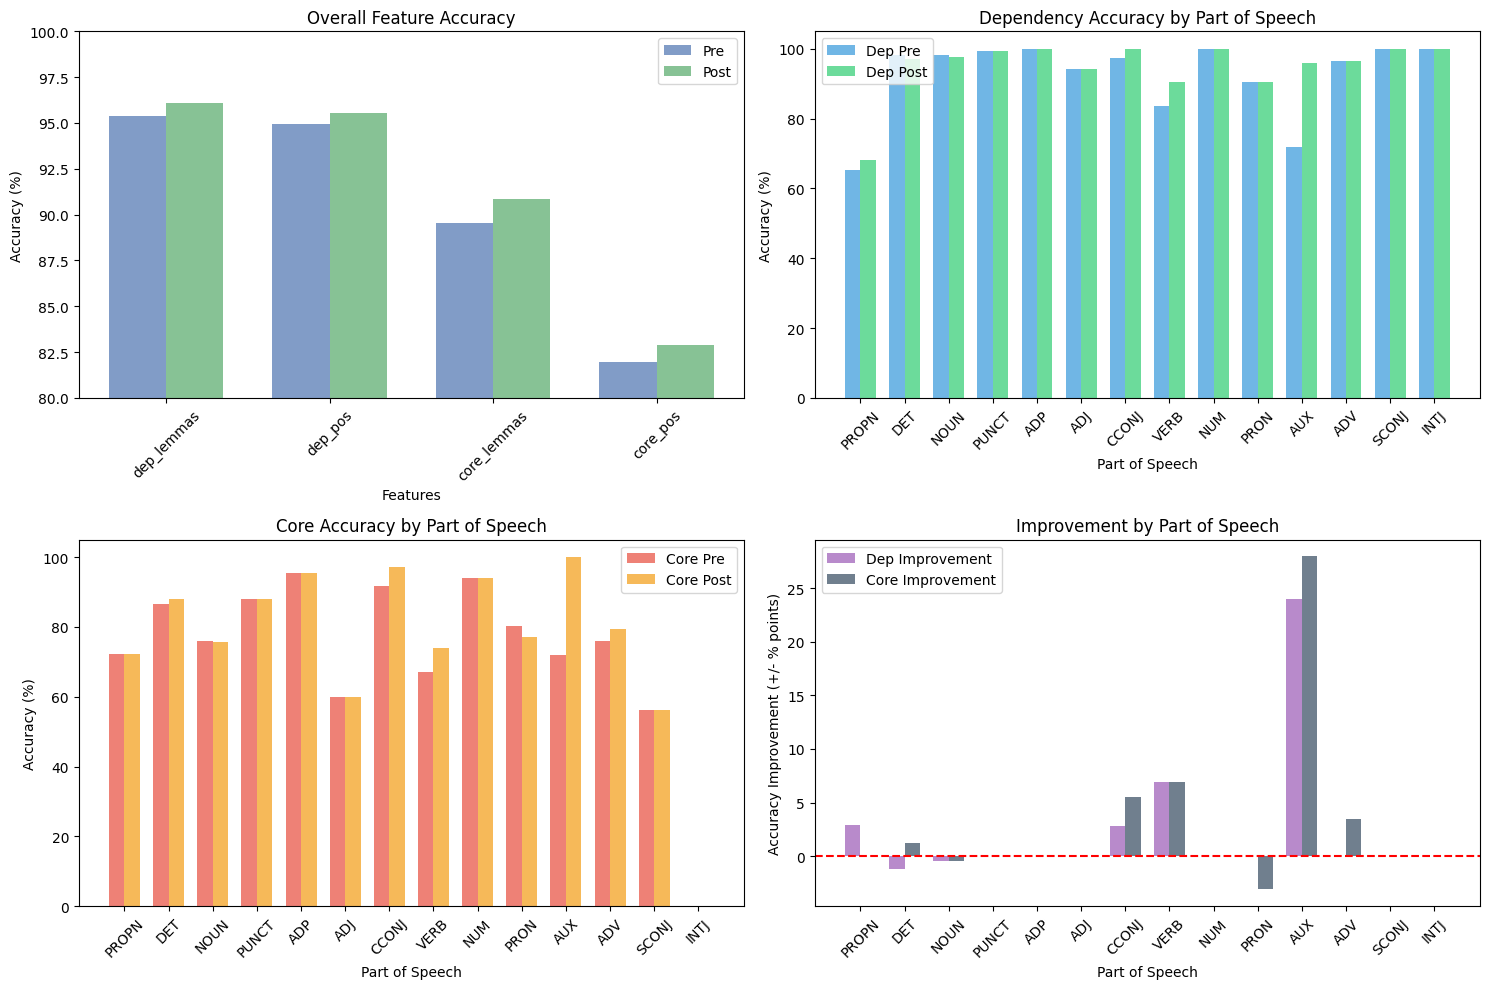


Overall Accuracy Changes:
dep_lemmas_pre: 95.4% → 96.11% (Change: +0.71%)
dep_pos_pre: 94.92% → 95.56% (Change: +0.64%)
core_lemmas_pre: 89.52% → 90.87% (Change: +1.35%)
core_pos_pre: 81.98% → 82.86% (Change: +0.88%)

Accuracy by Part of Speech:

PROPN:
  pre_dep: 65.38%
  post_dep: 68.27%
  pre_core: 72.12%
  post_core: 72.12%

DET:
  pre_dep: 98.18%
  post_dep: 96.97%
  pre_core: 86.67%
  post_core: 87.88%

NOUN:
  pre_dep: 98.22%
  post_dep: 97.78%
  pre_core: 76.00%
  post_core: 75.56%

PUNCT:
  pre_dep: 99.36%
  post_dep: 99.36%
  pre_core: 87.90%
  post_core: 87.90%

ADP:
  pre_dep: 100.00%
  post_dep: 100.00%
  pre_core: 95.54%
  post_core: 95.54%

ADJ:
  pre_dep: 94.29%
  post_dep: 94.29%
  pre_core: 60.00%
  post_core: 60.00%

CCONJ:
  pre_dep: 97.22%
  post_dep: 100.00%
  pre_core: 91.67%
  post_core: 97.22%

VERB:
  pre_dep: 83.48%
  post_dep: 90.43%
  pre_core: 66.96%
  post_core: 73.91%

NUM:
  pre_dep: 100.00%
  post_dep: 100.00%
  pre_core: 94.12%
  post_core: 94.12%

P

In [34]:
# ClaudeAI was consulted to generate plots for this data, as visualizing this data was quite difficult
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def analyze_linguistic_accuracy(df):
    """
    Comprehensive analysis of linguistic accuracy across different features and parts of speech.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing linguistic accuracy measurements
    
    Returns:
    --------
    dict : Dictionary containing various analysis results
    """
    # Identify boolean columns
    pre_bool_cols = [col for col in df.columns if col.endswith('_pre') and df[col].dtype == 'bool']
    post_bool_cols = [col for col in df.columns if col.endswith('_post') and df[col].dtype == 'bool']
    
    # Calculate accuracy percentages
    pre_percentages = (df[pre_bool_cols].mean() * 100).round(2)
    post_percentages = (df[post_bool_cols].mean() * 100).round(2)
    
    # Analyze accuracy by part of speech
    pos_accuracy = {}
    for pos in df['ground_truth_pos'].unique():
        pos_subset = df[df['ground_truth_pos'] == pos]
        pos_accuracy[pos] = {
            'pre_dep': (pos_subset['dep_lemmas_pre'] & pos_subset['dep_pos_pre']).mean() * 100,
            'post_dep': (pos_subset['dep_lemmas_post'] & pos_subset['dep_pos_post']).mean() * 100,
            'pre_core': (pos_subset['core_lemmas_pre'] & pos_subset['core_pos_pre']).mean() * 100,
            'post_core': (pos_subset['core_lemmas_post'] & pos_subset['core_pos_post']).mean() * 100
        }
    
    # Visualization of overall changes
    plt.figure(figsize=(15, 10))
    
    # Subplot 1: Overall Feature Accuracy
    plt.subplot(2, 2, 1)
    x = np.arange(len(pre_bool_cols))
    width = 0.35
    plt.bar(x - width/2, pre_percentages, width, label='Pre', color='#4C72B0', alpha=0.7)
    plt.bar(x + width/2, post_percentages, width, label='Post', color='#55A868', alpha=0.7)
    plt.title('Overall Feature Accuracy')
    plt.xlabel('Features')
    plt.ylabel('Accuracy (%)')
    plt.xticks(x, [col.replace('_pre','') for col in pre_bool_cols], rotation=45)
    plt.legend()
    plt.ylim(80, 100)
    
    # Subplot 2: Accuracy by Part of Speech
    plt.subplot(2, 2, 2)
    pos_names = list(pos_accuracy.keys())
    dep_pre = [pos_accuracy[pos]['pre_dep'] for pos in pos_names]
    dep_post = [pos_accuracy[pos]['post_dep'] for pos in pos_names]
    
    x = np.arange(len(pos_names))
    plt.bar(x - width/2, dep_pre, width, label='Dep Pre', color='#3498db', alpha=0.7)
    plt.bar(x + width/2, dep_post, width, label='Dep Post', color='#2ecc71', alpha=0.7)
    plt.title('Dependency Accuracy by Part of Speech')
    plt.xlabel('Part of Speech')
    plt.ylabel('Accuracy (%)')
    plt.xticks(x, pos_names, rotation=45)
    plt.legend()
    
    # Subplot 3: Core Accuracy by Part of Speech
    plt.subplot(2, 2, 3)
    core_pre = [pos_accuracy[pos]['pre_core'] for pos in pos_names]
    core_post = [pos_accuracy[pos]['post_core'] for pos in pos_names]
    
    plt.bar(x - width/2, core_pre, width, label='Core Pre', color='#e74c3c', alpha=0.7)
    plt.bar(x + width/2, core_post, width, label='Core Post', color='#f39c12', alpha=0.7)
    plt.title('Core Accuracy by Part of Speech')
    plt.xlabel('Part of Speech')
    plt.ylabel('Accuracy (%)')
    plt.xticks(x, pos_names, rotation=45)
    plt.legend()
    
    # Subplot 4: Comparison of Dep vs Core Improvement
    plt.subplot(2, 2, 4)
    dep_improvement = [pos_accuracy[pos]['post_dep'] - pos_accuracy[pos]['pre_dep'] for pos in pos_names]
    core_improvement = [pos_accuracy[pos]['post_core'] - pos_accuracy[pos]['pre_core'] for pos in pos_names]
    
    plt.bar(x - width/2, dep_improvement, width, label='Dep Improvement', color='#9b59b6', alpha=0.7)
    plt.bar(x + width/2, core_improvement, width, label='Core Improvement', color='#34495e', alpha=0.7)
    plt.title('Improvement by Part of Speech')
    plt.xlabel('Part of Speech')
    plt.ylabel('Accuracy Improvement (+/- % points)')
    plt.xticks(x, pos_names, rotation=45)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return {
        'overall_accuracy': {
            'pre': pre_percentages,
            'post': post_percentages
        },
        'pos_accuracy': pos_accuracy
    }

# Load and analyze data
df = pd.read_csv('acc_test_agg.csv')
results = analyze_linguistic_accuracy(df)

# Print summary
print("\nOverall Accuracy Changes:")
for feature, (pre, post) in zip(results['overall_accuracy']['pre'].index, 
                                 zip(results['overall_accuracy']['pre'], 
                                     results['overall_accuracy']['post'])):
    print(f"{feature}: {pre}% → {post}% (Change: {post-pre:+.2f}%)")

print("\nAccuracy by Part of Speech:")
for pos, accuracies in results['pos_accuracy'].items():
    print(f"\n{pos}:")
    for metric, value in accuracies.items():
        print(f"  {metric}: {value:.2f}%")